# <center> Trabalho 02: Regressão Linear </center>
## <center> Usando a linguagem R </center>
## <center> Taxa de consumo de oxigênio </center>

**Proposta**
* Analisar o tempo gasto para correr 1.5 milhas (em minutos) e a taxa de consumo de oxigênio (militros por minuto) em um grupo de homens envolvidos em um curso de *fitness* na N.C. State University.
* Avaliar se o modelo de regressão linear simples pode ser ajustado para as variáveis **tempo de corrida** e **taxa de consumo de oxigênio**

**Objetivo**
* Analisar e produzir um relatório contendo:
    * Análise de Dispersão
    * Análise de Distribuição
    * Correlação Linear
    * Teste de Normalidade
    * Ajuste do Modelo Linear
    * Previsão de Dados e Coeficiente de Determinação

#### Leitura do Dataset

O código abaixo realiza a leitura do arquivo com os dados referentes ao consumo de oxigênio. Para isso, será necessário utilizar a função ``read.table`` que faz a leitura dos dados numa forma estruturada.

In [2]:
oxygen <- read.table('./dataset/oxigenio.txt', header = TRUE)
head(oxygen, n = 5)

tempo,oxigenio
<dbl>,<dbl>
11.37,44.609
10.07,45.313
8.65,54.297
8.17,59.571
9.22,49.874


#### Análise de Dispersão dos dados

Para esta análise será feito um gráfico do consumo de oxigênio (*eixo-y*) por tempo de corrida (*eixo-x*). Para esta etapa é necessário o uso do pacote ``ggplot2``.

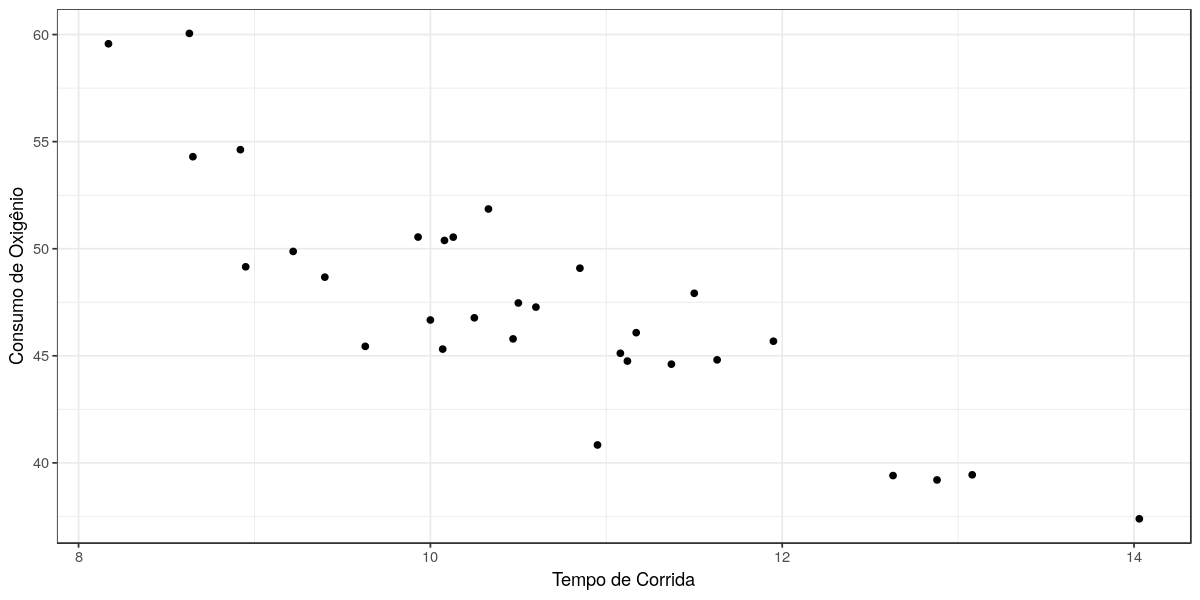

In [3]:
options(repr.plot.width = 10, repr.plot.height = 5)
library(ggplot2)
ggplot(oxygen, aes(x = tempo, y = oxigenio)) + geom_point() +
theme_bw() +
labs( x = "Tempo de Corrida", y = "Consumo de Oxigênio")

Existe uma correlação negativa entre o tempo de corrida e o consumo de oxigênio. Por exemplo, quanto maior for o tempo de corrida menor será o consumo de oxigênio.

#### Análise de Distribuição - Histograma

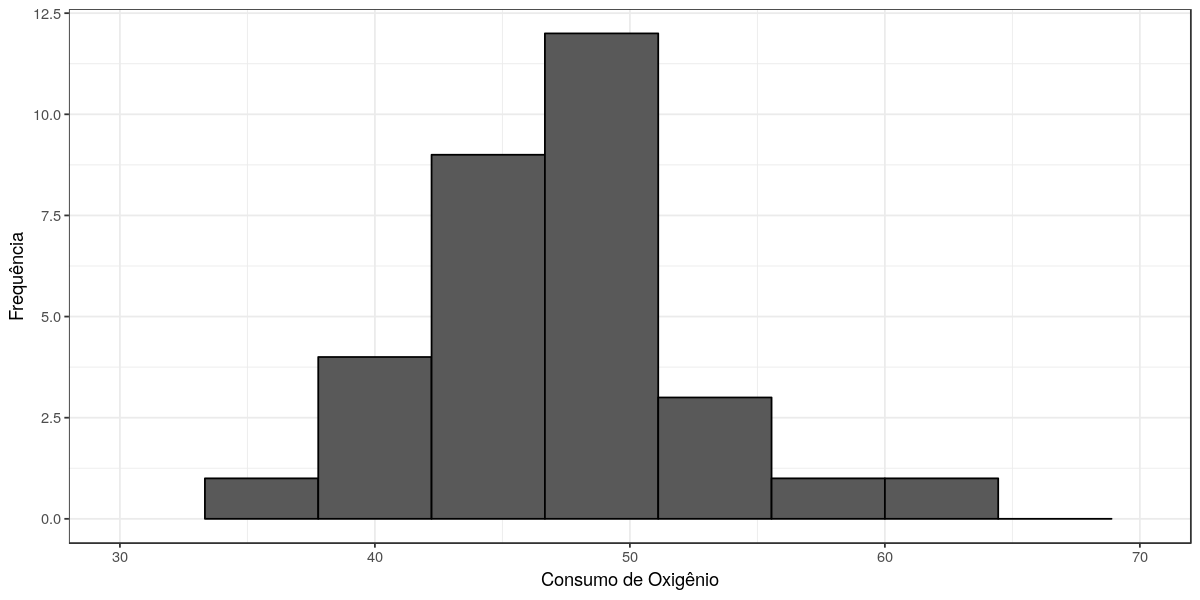

In [15]:
options(repr.plot.width = 10, repr.plot.height = 5)
library(ggplot2)
ggplot(oxygen, aes(x = oxigenio)) + geom_histogram(bins = 10, col = "black",na.rm=TRUE) +
xlim(30,70) + 
theme_bw() +
labs( x = "Consumo de Oxigênio", y = "Frequência") 

#### Coeficiente de Correlação Linear

Para o cálculo do coeficiente de correlação linear de Pearson é necessária a utilização da função ``cor``.

In [16]:
round(cor(oxygen$tempo, oxygen$oxigenio), digits = 2)

[1] -0.86

O coeficiente de correlação entre o tempo de corrida e o consumo de oxigênio é -0.86. Trata-se de um coeficiente negativo, ou seja, quando maior for o tempo de corrida menor será o consumo de oxigênio, também quanto maior for o consumo de oxigênio menor será o tempo de corrida. Outra informação é que temos uma ``forte correlação negativa``.

#### AJuste do Modelo de Regressão Linear Simples

A nossa variável **explicativa** é o **tempo de corrida** e a variável **resposta** é o **consumo de oxigênio**. O modelo adotado para este problema é a regressão linear simples, que é dada pela seguinte equação:
$$y = \beta_0 + \beta_1 x + \epsilon$$
onde $\beta_0$ é uma constante que intercepta o eixo *y* (no caso o eixo do consumo de oxigênio) e $\beta_1$ é o coeficiente angular da reta em relação a variável explicativa.

Para o ajuste do modelo de regressão linear em R é necessário utilizar a função ``lm``.

In [17]:
linear_model_oxygen <- lm(oxigenio ~ tempo, data = oxygen)
linear_model_oxygen


Call:
lm(formula = oxigenio ~ tempo, data = oxygen)

Coefficients:
(Intercept)        tempo  
     82.422       -3.311  


A equação que temos como resposta é:
$$\text{Oxigênio} = 82.4 -3.3\text{tempo} + \epsilon$$

#### Teste de Normalidade - Shapiro-Wilk

Para testar a normalidade dos resíduos do modelo de regressão linear é necessário a aplicação do Teste de Shapiro-Wilk usando a função ``shapiro.test``. Neste modelo, o resíduo ($e$) é a diferença entre o valor obtido experimentalmente para o consumo de oxigênio ($y$) e o valor predito de consumo de oxigênio ($\hat{y}$). $$e = y - \hat{y}$$

In [18]:
shapiro.test(residuals(linear_model_oxygen))


	Shapiro-Wilk normality test

data:  residuals(linear_model_oxygen)
W = 0.99066, p-value = 0.9932


A normalidade dos resíduos é confirmada pelo teste de normalidade, onde o p-valor obtido é 0.993 que é superior ao  p-valor de corte 0.05.

#### Previsão de Vendas

No item **AJuste do Modelo de Regressão Linear Simples** obtivemos a equação resposta para o problema. Nesta etapa será realizada uma previsão de consumo de oxigênio para um tempo de corrida no valor de 12 minutos.

In [19]:
tempo <- 12
predict(linear_model_oxygen, newdata = tempo)

1 
42.69511

#### Ajuste da reta pelo modelo linear

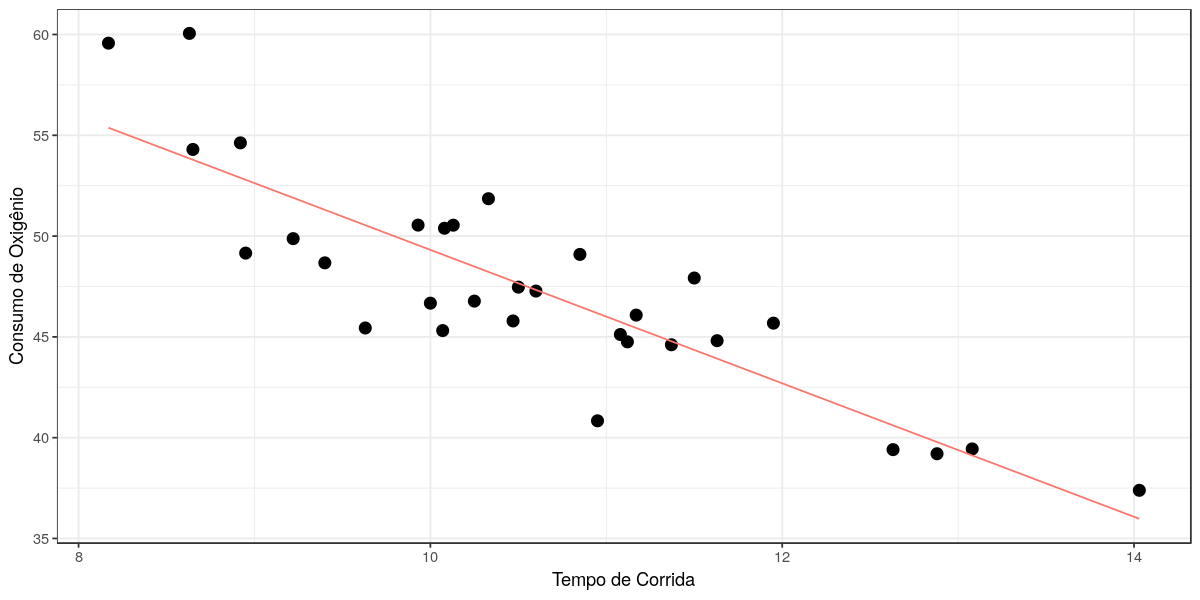

In [21]:
ggplot(oxygen, aes(x = tempo, y = oxigenio)) + geom_point(size = 3) + 
geom_line(data = fortify(linear_model_oxygen), aes(x = tempo, y = .fitted, col = 'red' )) +
theme_bw() + theme(legend.position = "none") +
labs( x = "Tempo de Corrida", y = "Consumo de Oxigênio")

##### Avaliação da Qualidade do Modelo

O coeficiente de determinação R$^2$, reflete a qualidade do ajuste do modelo. O quanto o modelo consegue explicar o conjunto de dados.

In [25]:
summary(linear_model_oxygen)$r.squared

[1] 0.7433801

O modelo consegue explicar somente 74.3% dos dados observados, talvez fosse necessário incluir outras variáveis como indice de massa corpóreo, batimento cardíaco, grau de sedentarismo, etc.